# Load Data

In [473]:
# import tools
import pandas as pd
import numpy as np
from itertools import chain

import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px

In [474]:
#read data
successful = pd.read_excel('Lapapo-successful.xlsx')
'A dataset with {0} rows and {1} columns'.format(len(successful),len(successful.columns))

'A dataset with 48 rows and 37 columns'

In [475]:
unsuccessful = pd.read_excel('Lapapo-unsuccessful.xlsx')
'A dataset with {0} rows and {1} columns'.format(len(unsuccessful),len(unsuccessful.columns))

'A dataset with 150 rows and 32 columns'

In [476]:
successful.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 37 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Customer ID                     48 non-null     float64       
 1   Number of Sessions              48 non-null     int64         
 2   First Visit Date                48 non-null     datetime64[ns]
 3   First Visit Time                48 non-null     object        
 4   Second Visit Date               48 non-null     object        
 5   Second Visit Time               48 non-null     object        
 6   Third Visit Data                48 non-null     object        
 7   Third Visit Time                48 non-null     object        
 8   Fourth Visit Date               48 non-null     object        
 9   Fourth Visit Time               48 non-null     object        
 10  Add to Cart                     48 non-null     object        
 11  First Ad

In [477]:
unsuccessful.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Customer ID                     150 non-null    float64       
 1   Number of Sessions              150 non-null    int64         
 2   First Visit Date                150 non-null    datetime64[ns]
 3   First Visit Time                150 non-null    object        
 4   Second Visit Date               150 non-null    object        
 5   Second Visit Time               150 non-null    object        
 6   Third Visit Data                150 non-null    object        
 7   Third Visit Time                150 non-null    object        
 8   Fourth Visit Date               150 non-null    object        
 9   Fourth Visit Time               150 non-null    object        
 10  Add to Cart                     150 non-null    object        
 11  First 

In [478]:
# create the target variable 'Purchase' for both datasets
successful['Purchase'] = 'Yes'
unsuccessful['Purchase'] = 'No'
# concatenate two datasets
lapapo = pd.concat([successful,unsuccessful])

In [479]:
lapapo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 198 entries, 0 to 149
Data columns (total 38 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Customer ID                     198 non-null    float64       
 1   Number of Sessions              198 non-null    int64         
 2   First Visit Date                198 non-null    datetime64[ns]
 3   First Visit Time                198 non-null    object        
 4   Second Visit Date               198 non-null    object        
 5   Second Visit Time               198 non-null    object        
 6   Third Visit Data                198 non-null    object        
 7   Third Visit Time                198 non-null    object        
 8   Fourth Visit Date               198 non-null    object        
 9   Fourth Visit Time               198 non-null    object        
 10  Add to Cart                     198 non-null    object        
 11  First 

In [480]:
var = ['Customer ID','Number of Sessions','First Visit Date','First Visit Time','Add to Cart','Create Account','View Posts','View Categories','View Product Details','Number of Viewed Products','Average Time Spent per Session','Device','Channel','Purchase']
lapapo = lapapo[var]

In [481]:
len(lapapo[(lapapo['View Posts']=='Yes')|(lapapo['View Product Details']=='Yes')])

154

In [482]:
len(lapapo[(lapapo['View Posts']=='Yes')&(lapapo['View Product Details']=='Yes')])

8

In [483]:
len(lapapo[(lapapo['View Posts']=='No')&(lapapo['View Product Details']=='No')])

44

# Data Exploration

## Purchase

The dataset is imbalanced with roughly a quarter of records making purchase while the remaining not, which raises concern about the evaluation of the applied model because a naive model that simply predicts all records to be not successful can reach an accuracy rate of 75%. In other words, even though our model offers a promising predictive accuracy rate of 80%, it is only 5% better than arbitrarily taking all predictions as successful and fails to present a genuine preditive power.

In [205]:
# donut chart for Purchase
labels = ['Purchase','Not Purchase']
values = [48, 150]

# Use `hole` to create a donut-like pie chart
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.5)])
fig.update_layout(title='Purchase Behavior Distribution', title_x=0.47)
fig.show()

## Number of Sessions

Similar to the definition of **Session** by Cambridge Dictionary as a period during which you do an activity (https://dictionary.cambridge.org/dictionary/learner-english/session), Google Analytics (https://support.google.com/analytics/answer/6086069?hl=en) specifies **Session** to be the amount of time a user spends on the site, with any subsequent operation credited to a new session if the user is inactive for more than 30 minutes while any return to the website within 30 minutes reckoned as part of the original session. The 30 minutes duration was verifired as a reasonable threshold for session idenfitication by Catledge and Pitkow (1995) (https://www-sciencedirect-com.libproxy.ucl.ac.uk/science/article/pii/0169755295000437) who suggested that a 25.5-minute session could cover most user events statistically, and was accepted as a rule of thumb by Spiliopoulou (2003) (https://www-proquest-com.libproxy.ucl.ac.uk/docview/200513029/fulltext/E3FDDEBB10214111PQ/1?accountid=14511) and Mat-Hassan (2005) (https://www-proquest-com.libproxy.ucl.ac.uk/docview/231507173?OpenUrlRefId=info:xri/sid:primo&accountid=14511). Generally speaking, **session** can be viewed as a **visit**. The higher the number of sessions conducted by a user, the more loyal the user is.

Regardless of purchasing or not, the distribution of **Number of Sessions** presents a shape simliar to the exponential distribution, which fits the common sense that most people visit the website for curiosity and leave forever after noticing the content does not interest them with only a small percentage of true audiences returning to visit again. Only 14 out of 198 records contributed more than 2 sessions, that is 7% of all users.

However, the box plot demonstrates that the average number of sessions for those who purchase is higher than those who did not, supporting this variable as a potential candidate to distinguish between consumers and non-consumers.

In [206]:
# combined statistical chart for Number of Sessions
df = px.data.tips()
fig = px.histogram(lapapo, x='Number of Sessions', color='Purchase',
                   marginal='box', labels=['Yes','No'])
fig.update_traces(opacity=0.7)
fig.update_layout(title='Number of Sessions', title_x=0.47)
fig.show()

## Visit Date

While the exact date of visit is too detailed to generalize, **Month** is a variable of interest to reflect user behavior pattern based on seasonal factors. 

Among all visit date variables provided, **First Visit Date** is chosen to reflect the visit date across months pattern for several reasons. First of all, most users visit the website only once, making variables such as **Second Visit Date** and **Third Visit Date** involve a large number of blank values. Although it is technically feasible to take average over **Month**, which is recorded as integers in the dataset, this operation is not recommended because date has its instrinct meaning and the average number is hard to interpret. Secondly, among those who made multiple visits, the visit dates tend to close to each other. Hence, most information is already explored by focusing on **First Visit Date** only.

The overall number of visitors is raising in December and peaks in January, possibly due to the approach of Christmas and new year when priority is given to selecting gifts for families and friends. Additionally, the traffic is relatively high during March and May as well, for the reason that the company released advertisement on Google as part of its marketing campaign to draw audience. 

Further categorizing the data according to their purchase decisions, an interesting finding is that the trend of two groups does not move simultaneously across months. For instance, 14 people bought products and 12 did not in April while in May only 3 users made a purchase with 19 did not. This reversed pattern implies that visit date, or more sepcifically **Month**, offers insights to determine if a user would buy or not. Given that the dataset is small and the number of independent variables used should be limited as well to avoid overfitting, instead of creating dummy variables for all months (11 in total to eliminate perfect collinearity), simply creating one variable to indicate if the visit is conducted in certain months, such as January, April or May when the difference between the number of purchased users and non-purchased users is significant, can be constructive.

In [207]:
# extract Month from Visit Date and get Number of Customers who purchased and did not purchase in each month 
visit_date = lapapo[['Customer ID','First Visit Date','Purchase']]
visit_date['Month'] = visit_date['First Visit Date'].dt.month
visit_date_1 = visit_date.copy()
visit_date = visit_date.groupby(['Purchase','Month']).count().drop(columns='First Visit Date').rename(columns={'Customer ID':'Number of Customers'}).reset_index()
visit_date = visit_date.rename(columns={'Purchase':'Legend'}).replace({'Yes':'Purchase','No':'Not Purchase'})
# add a row to record no consumer made purchase in September
new_record = pd.DataFrame(data={'Legend':'Purchase','Month':9,'Number of Customers':0}, index=[12])
visit_date = visit_date.append(new_record)
visit_date = visit_date.sort_values(by='Month')


# get the total number of customers in each month
visit_date_1 = visit_date_1.groupby('Month').count().drop(columns=['First Visit Date','Purchase']).rename(columns={'Customer ID':'Number of Customers'}).reset_index()
visit_date_1['Legend'] = 'Overall'

# consolidate
visit_date = visit_date.append(visit_date_1)

<ipython-input-207-4ba56b0587b5>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [208]:
# line plot for the number of customer across months
fig = px.line(visit_date, x="Month", y="Number of Customers", color='Legend')
fig.update_layout(title='Number of Vistors across Months', title_x=0.47)
fig.show()

## Visit Time

For the similar reasons in the **Visit Date** section, **First Visit Time** is believed to be the best variable to represent the time pattern within one day. Rather than the exact time point, time is separated into a working time group, which is from 9:00 to 18:00, and a non-working time group, which is from 18:00 to 9:00 next day, for the comparison purpose.

Although the traffic is larger during working time than during non-working time with 120 and 78 customers respectively, non-working time visits make up 52% of total visits for purchased users while only take 35% for non-purchased users. That is to say, a user visiting the company website earlier than nine in the morning or later than six at night has a higher probability to make a purchase than the one visiting during working time. This pattern is explanable when taking exployment status of parents into account. As claimed by Office of National Statistics (2019) (https://www.ons.gov.uk/employmentandlabourmarket/peopleinwork/employmentandemployeetypes/articles/familiesandthelabourmarketengland/2019), 75.1% of mothers with dependent children were employed and 92.6% of fathers were in the labor markets in 2019 to meet the financial demands of raising children and sustaining the household, not to mention children with special needs may require extra investment in childcare and early education. As a result, target consumers of Lapapo are mostly occupied during daytime and have a tendency to visit and purchase during out-of-office time. This daily time pattern could help boost the prediction accuracy if it explains the part of variation that can not be dealt by other variables.

In [209]:
# extract Hour from First Visit Time
visit_time = lapapo[['Customer ID','First Visit Time','Purchase']]
visit_time['Hour'] = visit_time['First Visit Time'].astype(str).str[:2]
visit_time = visit_time.drop(columns=['First Visit Time'])
# categorize Hour into working time and non-working time
visit_time['Hour'].replace({'00':'Non-working Time','01':'Non-working Time','02':'Non-working Time',
                            '03':'Non-working Time','04':'Non-working Time','05':'Non-working Time',
                            '06':'Non-working Time','07':'Non-working Time','08':'Non-working Time',
                            '09':'Working Time','10':'Working Time','11':'Working Time','12':'Working Time',
                            '13':'Working Time','14':'Working Time','15':'Working Time','16':'Working Time',
                            '17':'Working Time','18':'Non-working Time','19':'Non-working Time',
                            '20':'Non-working Time','21':'Non-working Time','22':'Non-working Time',
                            '23':'Non-working Time','24':'Non-working Time'}, inplace=True)

visit_time.groupby(['Purchase','Hour']).count().rename(columns={'Customer ID':'Number of Customers'})

<ipython-input-209-a57795239b91>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Number of Customers
Purchase Hour                                 
No       Non-working Time                   53
         Working Time                       97
Yes      Non-working Time                   25
         Working Time                       23

In [210]:
# stacked bar chart on Time and Purchase
Decision=['Purchase', 'Not Purchase']
fig = go.Figure(data=[
    go.Bar(name='Working Time', x=Decision, y=[48,65]),
    go.Bar(name='Non-working Time', x=Decision, y=[52,35])])

# Change to stacked mode
fig.update_layout(barmode='stack', title='Visit Time Comparision Based on Purchase Decision', title_x=0.45)
fig.show()

# Add to Cart

**Add to Cart** is a variable reporting if the user add anything to his shopping cart and should be a strong predictor of the final purchase decision. Despite of the consumers who enjoy a clear target and checkout directly without adding goods of interest to the shopping cart and then browsing others, and other hesitating ones who do put products into the shopping cart but quit before purchasing, the action of adding something to the shopping cart mirrors the willingness to buy.

This intuition is in favor of the company dataset where 71% of purchased users utilized the shopping cart with only 11% of non-purchased users filling their virtual bags. This significant distinction not only validates the important role of this variable in the predictive model, but also draw attention on how to enhance this behavior to improve conversion rate when formulating strategies.

In [211]:
cart=lapapo[['Customer ID','Add to Cart','Purchase']]
# split records for customers who conducted multiple purchases
def chainer(s):
    return list(chain.from_iterable(s.str.split(',')))
lens = cart['Add to Cart'].str.split(',').map(len)
cart = pd.DataFrame({'Customer ID': np.repeat(cart['Customer ID'], lens),
                     'Add to Cart': chainer(cart['Add to Cart']),
                     'Purchase': np.repeat(cart['Purchase'], lens)})
cart.groupby(['Purchase','Add to Cart']).count().rename(columns={'Customer ID':'Number of Customers'})

Number of Customers
Purchase Add to Cart                     
No       No                           134
         Yes                           16
Yes      No                            13
         Yes                           35

In [212]:
# stacked bar chart on the percentage of users adding something to the shopping cart
Decision=['Purchase', 'Not Purchase']
fig = go.Figure(data=[
    go.Bar(name='No', x=Decision, y=[29,89]),
    go.Bar(name='Yes', x=Decision, y=[71,11])])

# use the stacked mode
fig.update_layout(barmode='stack', title='Add to Cart Percentage Comparison', title_x=0.5)
fig.show()

## Create Account

A variable named **Create Account** is specified to the action of setting up a profile on the website by entering basic information including user name, email address and contact number. Once signing in, previous order overviews as well as current order status are presented clearly, making it convenient for consumers to locate the product they want to re-purchase and to monitor their parcel logistics. The behavior of creating accounts is regarded as valuable to e-commerce platforms with benefit coming from both the conversion side, where this activity shows a proclivity to purchase, and the marketing side, where contract information can be used for following promotions. 

Nevertheless, the summary statistics of **Create Account** is not as satisfying as expected. As suggested by the company dataset, only 7 out of 198 users created an account. Apart from the growing concern of data privacy nowadays and the consequential aversion to share too much personal information online, Lapapo‘s omission could be the reason to blame. The website fails to actively encourage users to create accounts by sending pushes or showing banners along the user journey. Furthermore, unlike other brands and platforms where an account is required for proceeding to checkout, Lapapo allows its users to make the payment as a guest. As a result, there is merely 3.5% users who enjoy a personalised profile on Lapapo.

From the standpoint of model building, **Create Account** is concluded as unattractive as well for the following two reasons. When comparing the percentage distribution between purchased and non-purchased users, the difference is negligible with 6% of purchased users and 3% of non-purchased ones creating an account, which makes this variable less powerful in describing and predicting the purchase decisions in our dataset from the effectiveness perspective. In terms of the feasibility, taking into the size of the dataset into consideration, variable selection is critical during training to reduce the probability of unpleasant performance in new dataset, further reducing the probability of including **Create Account** into the model.

In [213]:
account = lapapo[['Customer ID','Create Account','Purchase']]
account.groupby(['Purchase','Create Account']).count().rename(columns={'Customer ID':'Number of Customers'})

Number of Customers
Purchase Create Account                     
No       No                              146
         Yes                               4
Yes      No                               45
         Yes                               3

In [214]:
# stacked bar chart on the percentage of users creating an account
Decision=['Purchase', 'Not Purchase']
fig = go.Figure(data=[
    go.Bar(name='No', x=Decision, y=[94,97]),
    go.Bar(name='Yes', x=Decision, y=[6,3])])

# use the stacked mode
fig.update_layout(barmode='stack', title='Create Account Percentage Comparison', title_x=0.5)
fig.show()

## View Articals

Lapapo goes beyond a pure ecommerce platform. Besides shopping pages, its website offers articals on various topics, including tips on taking care of children with special needs, community for parents, and founder's story and mission. There is plent of content to explore, which draws attention from audiences other than potential buyers. For example, some parents may visit the website with the purpose of meeting those in a similar condition, making friends and sharing experience, while others may be impressed by the profile of Lapapo's founder on Facebook and come to have a deeper exploration about the company mission. The extra traffic brought to the website for these reasons does not serve a clear purchasing purpose and **View Articals** can be selected as the variable to reflect if the user comes simply for interest.

The absolute number of users who viewed articals at least once is about 24% of the total, with the detailed distribution into purchased group and non-purchased group presenting a significant distinction. Only 6% of purchased users viewed articals during their visits on the website while there are nearly 30% of non-puchased ones have read some content besides shopping. This 24% difference in whether viewed any artical or not is imforative enough to represent user initiative, hence predicting final purchase.

In [215]:
browsing = lapapo[['Customer ID','View Posts','View Categories','View Product Details','Purchase']]
browsing.groupby(['Purchase','View Posts']).count().rename(columns={'Customer ID':'Number of Customers'}).drop(columns=['View Categories','View Product Details'])

Number of Customers
Purchase View Posts                     
No       No                          106
         Yes                          44
Yes      No                           45
         Yes                           3

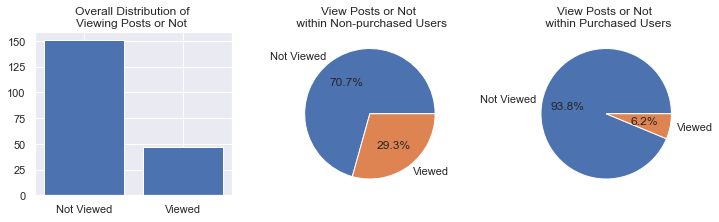

In [216]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
# prepare a bar chart for overall distribution
axs[0].bar(['Not Viewed','Viewed'], [151,47])
axs[0].set_title('Overall Distribution of \nViewing Posts or Not ')

# prepare a pie chart for distribution within non-purchased users
axs[1].pie(x=[106,44],labels=['Not Viewed','Viewed'], autopct='%1.1f%%')
axs[1].set_title('View Posts or Not \n within Non-purchased Users')

# prepare a pie chart for distribution within purchased users
axs[2].pie(x=[45,3],labels=['Not Viewed','Viewed'], autopct='%1.1f%%')
axs[2].set_title('View Posts or Not \n within Purchased Users')

plt.show()

## View Categories

The history of browsing categories can be thought of as an indicator of purchase. Some consumers come to the website targetlessly with a general goal of finding something for playing, eating or dressing, while others may browse category pages after they have made up their mind to buy something and are looking for other items of interest to make most use of the delivery fee charged. For those deep thinkers, even though they are impressed by one item, for example a piece of blanket, they would still browse the sleeping category to compare among several blankets to gaurantee they get their favorite ones. Thus, **View Categories** should reflect the a tendency to purchase.

Based on Lapapo data, 59 users viewed at least one category while the remaining 139 do not. Referred to the insight generated from **View Articals**, the low level of viewing categories fits the belief that some users visit the site for aims other than purchasing. In fact, a total number of 82 users, which is almost half of the dataset, view either articals or categories, but not both.

An obvious difference is witnessed if separating all users according to their purchase decisions, where half of the purchased group has browsed within categories but only 23% of non-purchased users viewed these pages, indicating that **View Categories** works as a potential candidate for forecasting user conversion and the overall purchase rate can be improved by encouraging users to browse categories and increasing the likelihood of user finding something of interest.

In [217]:
len(lapapo[(lapapo['View Posts']=='Yes')&(lapapo['View Categories']=='No')])+len(lapapo[(lapapo['View Posts']=='No')&(lapapo['View Categories']=='Yes')])

82

In [218]:
browsing.groupby(['Purchase','View Categories']).count().rename(columns={'Customer ID':'Number of Customers'}).drop(columns=['View Posts','View Product Details'])

Number of Customers
Purchase View Categories                     
No       No                               115
         Yes                               35
Yes      No                                24
         Yes                               24

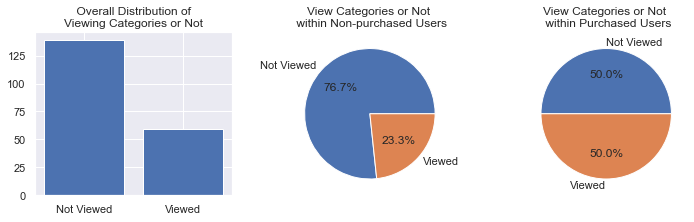

In [219]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
# prepare a bar chart for overall distribution
axs[0].bar(['Not Viewed','Viewed'], [139,59])
axs[0].set_title(' Overall Distribution of \nViewing Categories or Not')

# prepare a pie chart for distribution within non-purchased users
axs[1].pie(x=[115,35],labels=['Not Viewed','Viewed'], autopct='%1.1f%%')
axs[1].set_title('View Categories or Not \n within Non-purchased Users')

# prepare a pie chart for distribution within purchased users
axs[2].pie(x=[24,24],labels=['Not Viewed','Viewed'], autopct='%1.1f%%')
axs[2].set_title('View Categories or Not \n within Purchased Users')

plt.show()

## View Product Details

Besides viewing categories, the action of checking product details acts as a recordable variable of direct interest and curiosity towards a specific products. It is wise and common for online buyers to read the product descriptions carefully to overcome the shortage of virtual shopping when they cannot see and feel the product in person.

As stated by the company dataset, there are 115 users viewed product details with 83 not, which is higher than expectation. Compared with the number of visitors who have viewed at least one category page, a total of 56 users skipped the process of browsing category pages and got straight access to a specific item. The reasonable story behind is that some users came to the page through the adverstiment conducted on Facebook, attached with a direct link to the trampoline. Also, for those who have a specific target good, they might search the product name precisely on Google and thus be presented with an explicit link to detailed information. 

The difference in viewing product details or not is more significant when all users are divided by their purchase decisions. With less than half of the non-purchased users browsing product details, there are approximatelly 96% purchased users who did view product details before their payment, displaying a strong power of differentiating purchased users from non-purchased ones. Alternatively speaking, if the behavior of viewing detail pages is captured, that user enjoys a 40% chance of making a purchase, who is certainly worth noticing and deserves extra marketing attention. 

In [220]:
browsing.groupby(['Purchase','View Product Details']).count().rename(columns={'Customer ID':'Number of Customers'}).drop(columns=['View Posts','View Categories'])

Number of Customers
Purchase View Product Details                     
No       No                                     81
         Yes                                    69
Yes      No                                      2
         Yes                                    46

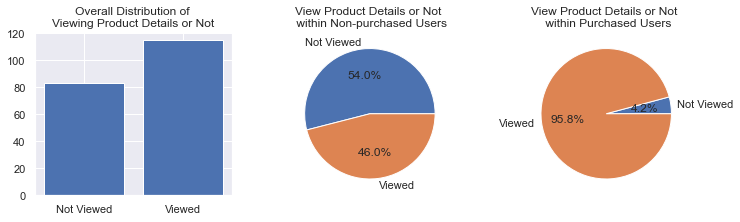

In [221]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
# prepare a bar chart for overall distribution
axs[0].bar(['Not Viewed','Viewed'], [83,115])
axs[0].set_title('Overall Distribution of \nViewing Product Details or Not')

# prepare a pie chart for distribution within non-purchased users
axs[1].pie(x=[81,69],labels=['Not Viewed','Viewed'], autopct='%1.1f%%')
axs[1].set_title('View Product Details or Not \n within Non-purchased Users')

# prepare a pie chart for distribution within purchased users
axs[2].pie(x=[2,46],labels=['Not Viewed','Viewed'], autopct='%1.1f%%')
axs[2].set_title('View Product Details or Not \n within Purchased Users')

plt.show()

## Number of Viewed Products

**Number of Viewed Products** counts the amount of items that the user has checked product details. Compared with **View Product Details**, which is a yes-no question, **Number of Viewed Products** gather additional magnitude information. The unique value of this numerical variable emerges espeically when the threshold for distinguishing purchased users from non-purchased ones is located beyond zero, meaning that while it is not viewing any product details or not that makes a difference, it is the rule that the more goods the user clicks and reads details about, the higher the possibility to buy that actually works.

According the company dataset, most non-purchased users only viewed 0 or 1 product details while an average of 1.5 goods are given a closer look within the purchased group. Moreover, the histogram for the purchased users is tail-heavy with extreme values from 4 to 9, but the largest number of viewed products is just 3 for the non-purchased group. This outcome fits intuition that users who come for a purchase are inclined to view more products either for comparison or for delivery fee efficient purpose, resulting in a higher average number of products viewed and supporting **Number of Viewed Products** as a potential strong candidate for the predictive model.

However, focusing on the purchased user only, 26 out of 48 viewed just one product in detail with the remaining 20 of them seeing more than one products and 2 of them not checking anything. Despite of the high average number, nearly half of the people in this group does not act differently from the non-purchased users. On one hand, it may be because of the limited attractiveness of products offered in the estore, making clicking on one more goods of interest hard to happen. On the other hand, the explanation that potential buyers of Lapapo are those with a clear target who seldom waste time on goods out of their plans also makes sense. Therefore, if a definite threshold is required, the number of viewed products being 2 is more likely to work since the amount of non-purchased users drops sharply when passing two while there are still roughly 42% of purchased users viewing at least two items.

In [222]:
# combined statistical chart for Number of Sessions
df = px.data.tips()
fig = px.histogram(lapapo, x='Number of Viewed Products', color='Purchase',
                   marginal='box', labels=['Yes','No'])
fig.update_traces(opacity=0.7)
fig.update_layout(title='Number of Viewed Products', title_x=0.5)
fig.show()

## Average Time Spent per Session

**Average Time Spent per Session**, calculated through dividing overall time length on the website by the number of sessions, is another critical metric commonly used for ecommerce platforms (https://databox.com/average-session-duration-benchmark#definition). Rather than measuring how frequently a user visits the webpage, which is achieved by **Number of Sessions**, average session duration reflects how engaged the user is. The longer the time period, the more deeply the user explores the website and the more likely he will be impressed and perform as what the company wants, that is making a purchase for Lapapo.

An exponential-like distribution is witnessed for the non-purchased group, where roughly two thirds of them spent less than 50 seconds on the company websit and the remaining 44 individuals invest more than 50 seconds but less than 250 seconds. The pattern is understandable as users get noticed of the company through various methods, including referral, Facebook, Instagram, Google or any marketing activities conducted by Lapapo, only part of whom are truely fascinated with the company products or concerned about the topic of children with speical needs. On the report of SWEOR (https://www.sweor.com/firstimpressions), it only takes 0.05 seconds for users to shape their initial opinions on the website and make up their mind on if they would stay or leave, and another 12 seconds to digest the images and written content presented if they proceed, indicating that one minute is far more than enough for a bored user to leave and that is why most people bounce out the company website within 50 seconds.

As for those who finally made a payment, regardless of the three people who checked out within 50 seconds, the session duration is longer than the non-purchased group on average with 50% of them spend between 160 seconds and 788 seconds, which is roughly 3 to 13 minutes. In comparison with the necessary duration of 30 minutes for an online purchase proposed by Chris (https://www.shinyshiny.tv/2020/09/seven-steps-of-an-online-purchase-3-5-hours-to-complete.html), Lapapo consumers are much more efficient when making the decision. Specifically speaking, the target group of Lapapo is deterministic when shopping, given the special condition of their children. Take families having children with eczema or allergic scalp as an example, these parents have a clear idea on what they are looking for, which are the softest clothes and tools that can avoid scratching like mittens. Seldom do they browse other irrelevant products, such as diabete bags or spoke covers that are uniquely designed for children with other specific conditions.

Moreover, since **Average Time Spent per Session** for purchased and non-purchased consumers gather at different center points, this variable is valuable when predictiving the purchase decision.

In [223]:
# combined statistical chart for Number of Sessions
df = px.data.tips()
fig = px.histogram(lapapo, x='Average Time Spent per Session', color='Purchase',
                   marginal='box', labels=['Yes','No'])
fig.update_traces(opacity=0.7)
fig.update_layout(title='Average Time Spent per Session', title_x=0.5)
fig.show()

## Device

Thanks to the development of technology, other than desktops, mobile phones and tablets are taking an increasing share in terms of online browsing and shopping. Due to the mobility, these easy-to-carry devices serve as a perfect mean to read news, search online and use social media platforms wherever you are, bringing in huge traffic to websites. However, based on the purpose of the user, the most commonly-used device could be different, with desktop being more suitable for searching schloarly papers while mobile being more attractive for reading Instagram posts leisurely. Therefore, the effort on identifying the difference in device preference between purchased users and non-purchased ones can offer another variable for the prediction purpose.

The device overall distribution in Lapapo illustrates that more than half of the users chose mobile phones to visit the company website while desktop ranks the second and only 7 people use tablets, which not only fits the general social trend where more and more people take mobile phones as the necessity to surf online but also presents the result of the marketing activities done by Lapapo on Facebook and Instagram where people use smart phones to visit these sites mostly and clicks the advertisments or links attached in posts. The similar distribution is found within non-purchased users as well where 49% of users using mobile phones and 47% of them using desktop. 

Nonetheless, Lapapo dataset exhibits a reverse pattern that over 65% purchased users completed the order on their phones but only 31% of the purchases are conducted by desktops, contradicted to Saurabh (https://medium.com/roi-overload/the-ultimate-mobile-vs-desktop-marketing-strategy-692bbe59c324) and Tabitha (https://www.digitalcommerce360.com/2019/07/24/consumers-order-more-on-desktop-than-mobile-for-online-retailers/), who argued that desktop is the most commonly-used device for ecommerce orders as the large screen provides buyers with extra convenience. To explain this, two angles can be considered. Firstly, while most people are inclined to use desktops, the detailed situation within different age groups could be different. As the rise of morden smartphone began mainly from 1992 (https://www.textrequest.com/blog/history-evolution-smartphone/), it is the users aged below 35 now who are the deep and loyal users of mobile phones and these people consist of the majority group of having a child currently. Thus, the mobile usage of Lapapo, which is a baby and children product estore, could be higher. Moreover, taken the timetable of parents into account, most time is devoted to accompanying their children from feeding and bathing to playing and story-telling, leaving limited time for them to sit down and browse the shopping platforms in front of a computer delicately. Cases are even worse when the bady is completely dependent and parents have to be alert almost for the whole day. The more convenient smartphone shopping thus becomes a favorable choice of busy parents.

Regarding to the model building consideration, the difference in device preferences between purchased and non-purchased users can contribute to the predictive purpose. Although the 15% re-balanced percenatge between mobiles and desktops is not as significant as other variables, like **View Product Details** and **View Categories**, **device** is still valuable when it explains the variation that is barely solved by others.

In [224]:
device = lapapo[['Customer ID','Device','Purchase']]
device.groupby(['Purchase','Device']).count().rename(columns={'Customer ID':'Number of Customers'})

Number of Customers
Purchase Device                      
No       desktop                   70
         mobile                    74
         tablet                     6
Yes      desktop                   15
         mobile                    32
         tablet                     1

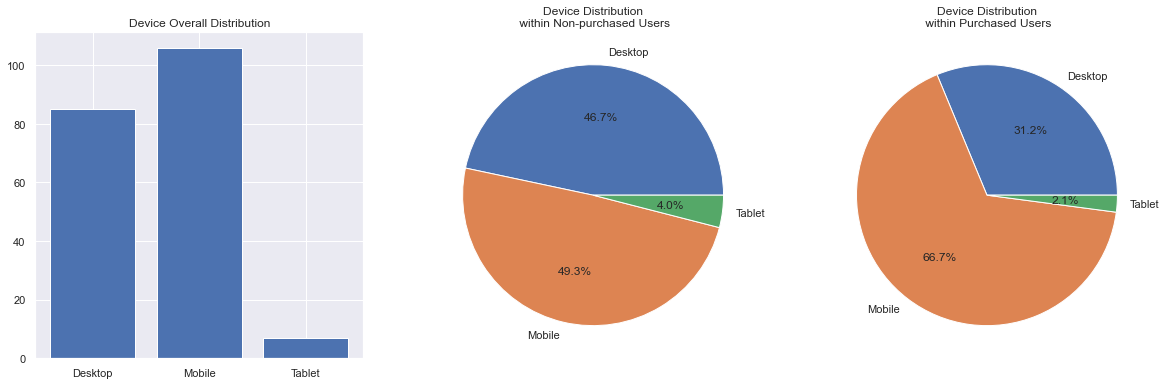

In [225]:
fig, axs = plt.subplots(1, 3, figsize=(20, 6))
# prepare a bar chart for overall distribution
axs[0].bar(['Desktop','Mobile','Tablet'], [85,106,7])
axs[0].set_title('Device Overall Distribution')

# prepare a pie chart for distribution within non-purchased users
axs[1].pie(x=[70,74,6],labels=['Desktop','Mobile','Tablet'], autopct='%1.1f%%')
axs[1].set_title('Device Distribution\n within Non-purchased Users')

# prepare a pie chart for distribution within purchased users
axs[2].pie(x=[15,32,1],labels=['Desktop','Mobile','Tablet'], autopct='%1.1f%%')
axs[2].set_title('Device Distribution\n within Purchased Users')

plt.show()

## Channel

**Channel** casts information on where the user comes from, which is worth exploring for the reason that identifying the most valuable channel for the company as well as any significant difference between preferences of purchased and non-purchased groups can help allocate marketing force accordingly as well as enhance the predictive power of the model applied. For the four channels captured in the dataset, **direct** means searching the company website URL specifically in browsers or visiting the web through a bookmark made before, with **social** representing those who are directed from other websites like Facebook and Instagram or are referred through a friend by a shared link. **Organic** and **Paid Search** are opposite to each other with the former one from the search engine results that are purely based on relevance and the later one from results that are influenced by paid advertisements.

Most users visited Lapapo website through organic searching and a remaining of 65 individuals put the URL link directly in their browers. **Social** and **Paid Search** are not as popular as the previous two at Lapapo with a total of 23%. Diving into the data of separated purchased and non-purchased groups, **Direct** takes a larger part among those who did not purchase with the number of 37% while only 32% of users come through organic searching. In comparison, the share of direct searching drops greatly to 19% for the purchased group where **Organic** takes the majority of 77%. The traffic from **Social** as well as **Paid Search** also decreases if only the purchased users are considered, with the number of 2% and 2% respectively. There is no doubt that **Organic Seach** deserves most attention because it is where the most overall traffic originiates as well as is also the most perferable channel for purchased users, but the ineffectiveness of **Paid Seach** is worrying. 17% of the total traffic is drawn from these advertisments but only one out of 17 is converted. Rather than simply concluding advertising is not effective for Lapapo, the true logic behind could lie in mis-target or inaccurate target. Since advertisements are distributed to everyone targetlessly, parents with normal children also receive the promotion information, who could eaily quit the website once they notice that Lapapo is more designed for children with speical needs. Although products like trampolines are usable for all children, parents are reluctant to purchase on such speicially-designed estores without a significant price discount. Therefore, due to the niche market targeted by Lapapo, a broad marketing activiting fails to work outstandingly.

As for the model variable selection, the significantly different distribution between two groups of users makes **Channel** a potentially promising candidate. For those who comes from another social platform, a referal by friends, a paid search or a direct search, the likelihood for them to make an order is low.

In [226]:
source = lapapo[['Customer ID','Channel','Purchase']]
source.groupby(['Purchase','Channel']).count().rename(columns={'Customer ID':'Number of Customers'})

Number of Customers
Purchase Channel                         
No       direct                        56
         organic                       48
         paid search                   14
         social                        32
Yes      direct                         9
         organic                       37
         paid search                    1
         social                         1

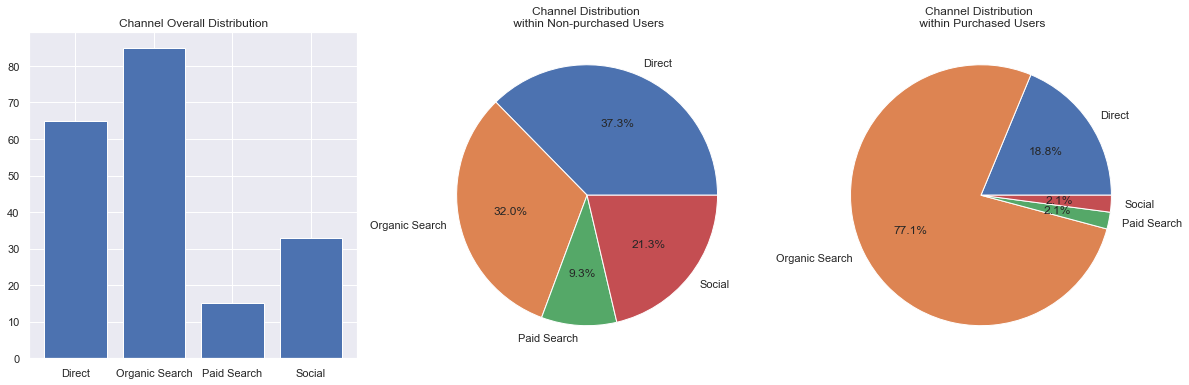

In [227]:
fig, axs = plt.subplots(1, 3, figsize=(20, 6))
# prepare a bar chart for overall distribution
axs[0].bar(['Direct','Organic Search','Paid Search','Social'], [65,85,15,33])
axs[0].set_title('Channel Overall Distribution')

# prepare a pie chart for distribution within non-purchased users
axs[1].pie(x=[56,48,14,32],labels=['Direct','Organic Search','Paid Search','Social'], autopct='%1.1f%%')
axs[1].set_title('Channel Distribution \n within Non-purchased Users')

# prepare a pie chart for distribution within purchased users
axs[2].pie(x=[9,37,1,1],labels=['Direct','Organic Search','Paid Search','Social'], autopct='%1.1f%%')
axs[2].set_title('Channel Distribution \n within Purchased Users')

plt.show()

# Modify Dataset

## Feature Engineering

#### Check Missing Values & duplicates

In [487]:
lapapo['Month'] = lapapo['First Visit Date'].dt.month

lapapo['Hour'] = lapapo['First Visit Time'].astype(str).str[:2]
lapapo['Hour'].replace({'00':'Non-working Time','01':'Non-working Time','02':'Non-working Time',
                            '03':'Non-working Time','04':'Non-working Time','05':'Non-working Time',
                            '06':'Non-working Time','07':'Non-working Time','08':'Non-working Time',
                            '09':'Working Time','10':'Working Time','11':'Working Time','12':'Working Time',
                            '13':'Working Time','14':'Working Time','15':'Working Time','16':'Working Time',
                            '17':'Working Time','18':'Non-working Time','19':'Non-working Time',
                            '20':'Non-working Time','21':'Non-working Time','22':'Non-working Time',
                            '23':'Non-working Time','24':'Non-working Time'}, inplace=True)

lapapo = lapapo.drop(columns=['First Visit Date','First Visit Time'])

In [488]:
lapapo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 198 entries, 0 to 149
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Customer ID                     198 non-null    float64
 1   Number of Sessions              198 non-null    int64  
 2   Add to Cart                     198 non-null    object 
 3   Create Account                  198 non-null    object 
 4   View Posts                      198 non-null    object 
 5   View Categories                 198 non-null    object 
 6   View Product Details            198 non-null    object 
 7   Number of Viewed Products       198 non-null    int64  
 8   Average Time Spent per Session  198 non-null    float64
 9   Device                          198 non-null    object 
 10  Channel                         198 non-null    object 
 11  Purchase                        198 non-null    object 
 12  Month                           198 

#### Drop outliers

In [489]:
lapapo['Number of Sessions'].max()

11

In [490]:
lapapo['Average Time Spent per Session'].max()

3071.0

In [491]:
lapapo = lapapo[lapapo['Number of Sessions'] != 11]
lapapo = lapapo[lapapo['Average Time Spent per Session'] != 3071]

In [492]:
lapapo.shape

(196, 14)

#### Create New Variables

In [493]:
# create a month dummy that sums all months when the number of purchased users and non-purchased users are distinct
lapapo_yes = lapapo[lapapo['Purchase']=='Yes']
lapapo_yes = lapapo_yes[['Month','Purchase','Customer ID']].groupby(['Month','Purchase']).count().reset_index().rename(columns={'Customer ID':'Purchased'})
lapapo_no = lapapo[lapapo['Purchase']=='No']
lapapo_no = lapapo_no[['Month','Purchase','Customer ID']].groupby(['Month','Purchase']).count().reset_index().rename(columns={'Customer ID':'Non-Purchased'})

In [494]:
lapapo_month_new = pd.merge(lapapo_no,lapapo_yes,on='Month')
lapapo_month_new['Difference'] = lapapo_month_new['Non-Purchased'] - lapapo_month_new['Purchased']
lapapo_month_new

,Month,Purchase_x,Non-Purchased,Purchase_y,Purchased,Difference
0,1,No,25,Yes,2,23
1,2,No,11,Yes,4,7
2,3,No,17,Yes,8,9
3,4,No,12,Yes,11,1
4,5,No,19,Yes,3,16
5,6,No,15,Yes,3,12
6,7,No,6,Yes,4,2
7,8,No,12,Yes,4,8
8,10,No,7,Yes,2,5
9,11,No,8,Yes,1,7


In [495]:
lapapo['Special Months'] = (lapapo['Month']==1)|(lapapo['Month']==4)|(lapapo['Month']==5)

In [496]:
# create a new dummy that reflects if the user views more than 2 products in detail
lapapo['View More than 2 Products'] = lapapo['Number of Viewed Products']>=2

In [497]:
# create a new dummy that reflects if the user uses mobile
lapapo['Mobile'] = lapapo['Device'] == 'mobile'
# create a new dummy that reflects if the user comes from organic search
lapapo['Organic'] = lapapo['Channel'] == 'organic'
# create a new dummy that reflects if the users visits during non-working time
lapapo['Non-working'] = lapapo['Hour'] == 'Non-working Time'

## Feature Selection

**Customer ID** and **Create Account** is not helpful

**Device** and **Channel** can be replaced by **Mobile** and **Organic**

**Month** can be replaced by **Special Months**

**Hour** can be replaced by **Non-working Time**

**Number of Viewed Products** can be replaced by **View More than 2 Products**

In [242]:
lapapo = lapapo.drop(columns=['Customer ID','Create Account','Device','Channel','Month','Hour','Number of Viewed Products'])

In [498]:
lapapo = lapapo.replace({'Yes':1,'No':0,True:1,False:0})
lapapo

,Customer ID,Number of Sessions,Add to Cart,Create Account,View Posts,View Categories,View Product Details,Number of Viewed Products,Average Time Spent per Session,Device,Channel,Purchase,Month,Hour,Special Months,View More than 2 Products,Mobile,Organic,Non-working
0,8.491016e+08,2,1,0,0,0,1,1,118.0,desktop,organic,1,3,Working Time,0,0,0,1,0
2,1.242289e+08,2,1,0,0,1,1,1,176.5,mobile,organic,1,5,Non-working Time,1,0,1,1,1
3,1.361536e+08,2,0,0,0,1,1,1,24.0,mobile,organic,1,4,Working Time,1,0,1,1,0
4,1.449683e+09,4,1,0,0,0,1,1,97.5,mobile,direct,1,12,Working Time,0,0,1,0,0
5,1.391268e+09,1,1,0,0,0,1,1,382.0,mobile,organic,1,4,Working Time,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,8.694347e+08,1,0,0,0,0,0,0,17.0,tablet,social,0,1,Working Time,1,0,0,0,0
146,8.837852e+08,1,0,0,0,0,0,0,1.0,desktop,direct,0,5,Working Time,1,0,0,0,0
147,8.878250e+08,1,0,0,0,0,1,1,14.0,mobile,organic,0,7,Working Time,0,0,1,1,0
148,9.509049e+08,1,0,0,0,0,0,0,0.0,mobile,direct,0,1,Working Time,1,0,1,0,0


In [244]:
lapapo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 196 entries, 0 to 149
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Number of Sessions              196 non-null    int64  
 1   Add to Cart                     196 non-null    int64  
 2   View Posts                      196 non-null    int64  
 3   View Categories                 196 non-null    int64  
 4   View Product Details            196 non-null    int64  
 5   Average Time Spent per Session  196 non-null    float64
 6   Purchase                        196 non-null    int64  
 7   Special Months                  196 non-null    int64  
 8   View More than 2 Products       196 non-null    int64  
 9   Mobile                          196 non-null    int64  
 10  Organic                         196 non-null    int64  
 11  Non-working                     196 non-null    int64  
dtypes: float64(1), int64(11)
memory usag

In [245]:
# check correlation
s1 = lapapo['Number of Sessions']
s2 = lapapo['Average Time Spent per Session']
s1.corr(s2, method='pearson')

0.19033670104879374

In [246]:
from sklearn.feature_selection import SelectKBest, chi2
# select best n features
lapapo_y = lapapo['Purchase']
lapapo_x = lapapo[['Number of Sessions','Add to Cart','View Posts','View Categories','View Product Details','Average Time Spent per Session','Special Months','View More than 2 Products','Mobile','Organic','Non-working']]
KBest = SelectKBest(chi2, k=5).fit(lapapo_x, lapapo_y) 
f = KBest.get_support(1)
lapapo_x = lapapo_x[lapapo_x.columns[f]]

In [247]:
lapapo_x

,Add to Cart,View Product Details,Average Time Spent per Session,View More than 2 Products,Organic
0,1,1,118.0,0,1
2,1,1,176.5,0,1
3,0,1,24.0,0,1
4,1,1,97.5,0,0
5,1,1,382.0,0,1
...,...,...,...,...,...
145,0,0,17.0,0,0
146,0,0,1.0,0,0
147,0,1,14.0,0,1
148,0,0,0.0,0,0


## Oversampling

In [248]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTENC
print(f'Original dataset samples per class {Counter(lapapo_y)}')

Original dataset samples per class Counter({0: 150, 1: 46})


In [249]:
sm = SMOTENC(sampling_strategy=45/55, random_state=42, categorical_features=[0,2,3])
lapapo_x_new, lapapo_y_new = sm.fit_resample(lapapo_x, lapapo_y)

print(f'Resampled dataset samples per class {Counter(lapapo_y_new)}')

Resampled dataset samples per class Counter({0: 150, 1: 122})


## Standardize

In [250]:
lapapo_x_new_num = lapapo_x_new[['Average Time Spent per Session']]
lapapo_x_new_cat = lapapo_x_new[['Add to Cart','View More than 2 Products','Organic']]

In [251]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

full_pipeline= ColumnTransformer([                 
        ("num", StandardScaler(), ['Average Time Spent per Session'])
        ])
lapapo_x_new_num = full_pipeline.fit_transform(lapapo_x_new_num)

lapapo_x_new_num = pd.DataFrame(lapapo_x_new_num).rename(columns={0:'Number of Sessions',1:'Average Time Spent per Session'})

In [252]:
lapapo_x_final = pd.merge(lapapo_x_new_num,lapapo_x_new_cat,right_index=True,left_index=True)
lapapo_y_final = lapapo_y_new

# Split Data

In [253]:
from sklearn.model_selection import train_test_split
# split data into training set and test set
X_train, X_test, y_train, y_test = train_test_split(lapapo_x_final, lapapo_y_final, test_size=0.2, random_state=42)

# Model Training and Fine-tuning

## Regression

In [254]:
# train a linear logistic regression model and pass through a 5-fold cross validation
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
from sklearn.model_selection import cross_val_score
score = cross_val_score(log_reg, X_train, y_train, cv=5)

# define a function to show results of cross validation
def show_cv_results(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

# present results
show_cv_results(score)

Scores: [0.79545455 0.86363636 0.93023256 0.86046512 0.95348837]
Mean: 0.8806553911205073
Standard deviation: 0.05606963028922041


In [255]:
# train a logistic regression with liblinear as penalty
log_liblinear = LogisticRegression(penalty='l1', solver='liblinear')
score = cross_val_score(log_liblinear, X_train, y_train, cv=5)
show_cv_results(score)

Scores: [0.88636364 0.86363636 0.97674419 0.86046512 0.95348837]
Mean: 0.9081395348837209
Standard deviation: 0.0479388931747994


In [256]:
# train a logistic regression with saga as penalty
log_saga = LogisticRegression(penalty='l1', max_iter=2000, solver='saga')
score = cross_val_score(log_saga, X_train, y_train, cv=5)
show_cv_results(score)

Scores: [0.86363636 0.86363636 0.97674419 0.86046512 0.95348837]
Mean: 0.9035940803382664
Standard deviation: 0.050781343234921936


## Tree

In [257]:
# train a classification tree
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
score = cross_val_score(tree, X_train, y_train, cv=5)
show_cv_results(score)

Scores: [0.95454545 0.81818182 0.95348837 0.88372093 0.97674419]
Mean: 0.9173361522198732
Standard deviation: 0.058621488845382916


## Forest

In [258]:
# train a classification tree
from  sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier()
score = cross_val_score(forest, X_train, y_train, cv=5)
show_cv_results(score)

Scores: [0.93181818 0.86363636 0.97674419 0.88372093 0.97674419]
Mean: 0.9265327695560254
Standard deviation: 0.04660283197105585


## Support Vector Machines

In [259]:
# train a linear SVM classifier
from sklearn.svm import SVC
svm_linear = SVC(kernel='linear', random_state=42)
score = cross_val_score(svm_linear, X_train, y_train, cv=5)
show_cv_results(score)

Scores: [0.79545455 0.88636364 0.90697674 0.86046512 0.95348837]
Mean: 0.8805496828752641
Standard deviation: 0.05233892669419508


In [260]:
# train a SVM classifier with rbf kernel
from sklearn.svm import SVC
svm_rbf = SVC(kernel='rbf', random_state=42)
score = cross_val_score(svm_rbf, X_train, y_train, cv=5)
show_cv_results(score)

Scores: [0.79545455 0.88636364 0.90697674 0.86046512 0.95348837]
Mean: 0.8805496828752641
Standard deviation: 0.05233892669419508


In [261]:
# train a SVM classifier with ploy kernel
from sklearn.svm import SVC
svm_poly = SVC(kernel='poly', random_state=42)
score = cross_val_score(svm_poly, X_train, y_train, cv=5)
show_cv_results(score)

Scores: [0.77272727 0.88636364 0.8372093  0.81395349 0.93023256]
Mean: 0.8480972515856238
Standard deviation: 0.05509174621531444


In [262]:
# train a SVM classifier with sigmoid kernel
from sklearn.svm import SVC
svm_sigmoid = SVC(kernel='sigmoid', random_state=42)
score = cross_val_score(svm_sigmoid, X_train, y_train, cv=5)
show_cv_results(score)

Scores: [0.77272727 0.86363636 0.88372093 0.88372093 0.93023256]
Mean: 0.8668076109936574
Standard deviation: 0.05187679927275738


## K-NN

In [263]:
# train a knn classifier with k being 4
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=4)
score = cross_val_score(knn, X_train, y_train, cv=5)
show_cv_results(score)

Scores: [0.84090909 0.79545455 0.88372093 0.86046512 0.97674419]
Mean: 0.8714587737843551
Standard deviation: 0.06011017362993561


## Neural Network

In [264]:
from sklearn.neural_network import MLPClassifier
ann_relu = MLPClassifier(solver='lbfgs', activation='relu', hidden_layer_sizes=(50,2), max_iter=2000, random_state=42)
score = cross_val_score(ann_relu, X_train, y_train, cv=5)
show_cv_results(score)

Scores: [0.90909091 0.86363636 0.93023256 0.86046512 0.88372093]
Mean: 0.8894291754756871
Standard deviation: 0.026789063951724573


In [265]:
from sklearn.neural_network import MLPClassifier
ann_tanh = MLPClassifier(solver='lbfgs', activation='tanh', hidden_layer_sizes=(10,2), max_iter=20000, random_state=42)
score = cross_val_score(ann_tanh, X_train, y_train, cv=5)
show_cv_results(score)

Scores: [0.90909091 0.79545455 0.95348837 0.86046512 0.93023256]
Mean: 0.8897463002114165
Standard deviation: 0.05625784469581543


In [266]:
from sklearn.neural_network import MLPClassifier
ann_logistic = MLPClassifier(solver='lbfgs', activation='logistic', hidden_layer_sizes=(10,2), max_iter=20000, random_state=42)
score = cross_val_score(ann_logistic, X_train, y_train, cv=5)
show_cv_results(score)

Scores: [0.90909091 0.88636364 0.93023256 0.86046512 0.93023256]
Mean: 0.903276955602537
Standard deviation: 0.026854887917716248


## Fine-Tuning

Model_1 -- KNN, 45/55, 5

In [267]:
# select 5 best features
lapapo_y = lapapo['Purchase']
lapapo_x = lapapo[['Number of Sessions','Add to Cart','View Posts','View Categories','View Product Details','Average Time Spent per Session','Special Months','View More than 2 Products','Mobile','Organic','Non-working']]
KBest = SelectKBest(chi2, k=5).fit(lapapo_x, lapapo_y) 
f = KBest.get_support(1)
lapapo_x = lapapo_x[lapapo_x.columns[f]]
# resampling to 45/55
sm = SMOTENC(sampling_strategy=45/55, random_state=42, categorical_features=[0,1,3,4])
lapapo_x_new, lapapo_y_new = sm.fit_resample(lapapo_x, lapapo_y)
print(f'Resampled dataset samples per class {Counter(lapapo_y_new)}')

Resampled dataset samples per class Counter({0: 150, 1: 122})


In [268]:
# standardize
lapapo_x_new_num = lapapo_x_new[['Average Time Spent per Session']]
lapapo_x_new_cat = lapapo_x_new[['Add to Cart','View More than 2 Products','Organic','View Product Details']]
full_pipeline= ColumnTransformer([                 
        ("num", StandardScaler(), ['Average Time Spent per Session'])
        ])
lapapo_x_new_num = full_pipeline.fit_transform(lapapo_x_new_num)

lapapo_x_new_num = pd.DataFrame(lapapo_x_new_num).rename(columns={0:'Average Time Spent per Session'})

In [269]:
# consolidate final datasets
lapapo_x_final = pd.merge(lapapo_x_new_num,lapapo_x_new_cat,right_index=True,left_index=True)
lapapo_y_final = lapapo_y_new
# split data into training set and test set
X_train, X_test, y_train, y_test = train_test_split(lapapo_x_final, lapapo_y_final, test_size=0.2, random_state=42)

In [270]:
# fine-tuning
from sklearn.model_selection import GridSearchCV
params = {'n_neighbors':[1,2,3,4,5,6,7,8],
          'weights':['uniform','distance'],
          'p':[1,2]}

knn = KNeighborsClassifier()
knn_gs = clf = GridSearchCV(knn, param_grid=params, cv=5)
knn_gs.fit(X_train,y_train)
knn_gs.best_params_

{'n_neighbors': 3, 'p': 1, 'weights': 'uniform'}

In [271]:
# train the best model
model_1 = KNeighborsClassifier(**knn_gs.best_params_)
model_1.fit(X_train, y_train)
score = cross_val_score(model_1, X_train, y_train, cv=5)
show_cv_results(score)

Scores: [0.90909091 0.95454545 1.         0.93023256 0.97674419]
Mean: 0.9541226215644819
Standard deviation: 0.032296247702204336


Model_2 -- ANN-relu, 45/55. 5

In [272]:
# select 5 best features
lapapo_y = lapapo['Purchase']
lapapo_x = lapapo[['Number of Sessions','Add to Cart','View Posts','View Categories','View Product Details','Average Time Spent per Session','Special Months','View More than 2 Products','Mobile','Organic','Non-working']]
KBest = SelectKBest(chi2, k=5).fit(lapapo_x, lapapo_y) 
f = KBest.get_support(1)
lapapo_x = lapapo_x[lapapo_x.columns[f]]
# resampling to 45/55
sm = SMOTENC(sampling_strategy=45/55, random_state=42, categorical_features=[0,1,3,4])
lapapo_x_new, lapapo_y_new = sm.fit_resample(lapapo_x, lapapo_y)
print(f'Resampled dataset samples per class {Counter(lapapo_y_new)}')

Resampled dataset samples per class Counter({0: 150, 1: 122})


In [273]:
# standardize
lapapo_x_new_num = lapapo_x_new[['Average Time Spent per Session']]
lapapo_x_new_cat = lapapo_x_new[['Add to Cart','View More than 2 Products','Organic','View Product Details']]
full_pipeline= ColumnTransformer([                 
        ("num", StandardScaler(), ['Average Time Spent per Session'])
        ])
lapapo_x_new_num = full_pipeline.fit_transform(lapapo_x_new_num)

lapapo_x_new_num = pd.DataFrame(lapapo_x_new_num).rename(columns={0:'Average Time Spent per Session'})

In [274]:
# consolidate final datasets
lapapo_x_final = pd.merge(lapapo_x_new_num,lapapo_x_new_cat,right_index=True,left_index=True)
lapapo_y_final = lapapo_y_new
# split data into training set and test set
X_train, X_test, y_train, y_test = train_test_split(lapapo_x_final, lapapo_y_final, test_size=0.2, random_state=42)

In [275]:
# fine-tuning
params = {'hidden_layer_sizes':[(40,2),(45,2),(50,2),(55,2),(60,2),(100,2),
                                (40,5),(45,5),(50,5),(55,5),(60,5),(100,5),
                                (40,8),(45,8),(50,8),(55,8),(60,8),(100,8),],
          'learning_rate':['constant', 'invscaling', 'adaptive']}

ann_relu = MLPClassifier(solver='lbfgs', activation='relu', max_iter=2000, random_state=42)
ann_relu_gs = clf = GridSearchCV(ann_relu, param_grid=params, cv=5)
ann_relu_gs.fit(X_train,y_train)
ann_relu_gs.best_params_

{'hidden_layer_sizes': (100, 8), 'learning_rate': 'constant'}

In [276]:
# fine-tuning
params = {'hidden_layer_sizes':[(100,8),(120,8),(150,8),
                                (100,10),(120,10),(150,10),
                                (100,20),(120,20),(150,20)],
          'learning_rate':['constant', 'invscaling', 'adaptive']}

ann_relu = MLPClassifier(solver='lbfgs', activation='relu', max_iter=2000, random_state=42)
ann_relu_gs = clf = GridSearchCV(ann_relu, param_grid=params, cv=5)
ann_relu_gs.fit(X_train,y_train)
ann_relu_gs.best_params_

{'hidden_layer_sizes': (100, 20), 'learning_rate': 'constant'}

In [277]:
# fine-tuning
params = {'hidden_layer_sizes':[(100,20),(100,30),(100,50),(100,60),
                                (100,50,20),(100,60,30)],
          'learning_rate':['constant', 'invscaling', 'adaptive']}

ann_relu = MLPClassifier(solver='lbfgs', activation='relu', max_iter=2000, random_state=42)
ann_relu_gs = clf = GridSearchCV(ann_relu, param_grid=params, cv=5)
ann_relu_gs.fit(X_train,y_train)
ann_relu_gs.best_params_

{'hidden_layer_sizes': (100, 20), 'learning_rate': 'constant'}

In [278]:
# train the best model
model_2 = MLPClassifier(solver='lbfgs', activation='relu', max_iter=2000, random_state=42, hidden_layer_sizes=(100,20), learning_rate='constant')
model_2.fit(X_train, y_train)
score = cross_val_score(model_2, X_train, y_train, cv=5)
show_cv_results(score)

Scores: [0.95454545 0.95454545 1.         0.90697674 0.95348837]
Mean: 0.9539112050739957
Standard deviation: 0.029421094368114884


model_3 -- random forest, 50/50, 5

In [279]:
# select 5 best features
lapapo_y = lapapo['Purchase']
lapapo_x = lapapo[['Number of Sessions','Add to Cart','View Posts','View Categories','View Product Details','Average Time Spent per Session','Special Months','View More than 2 Products','Mobile','Organic','Non-working']]
KBest = SelectKBest(chi2, k=5).fit(lapapo_x, lapapo_y) 
f = KBest.get_support(1)
lapapo_x = lapapo_x[lapapo_x.columns[f]]
# resampling to 45/55
sm = SMOTENC(sampling_strategy=50/50, random_state=42, categorical_features=[0,1,3,4])
lapapo_x_new, lapapo_y_new = sm.fit_resample(lapapo_x, lapapo_y)
print(f'Resampled dataset samples per class {Counter(lapapo_y_new)}')

Resampled dataset samples per class Counter({1: 150, 0: 150})


In [280]:
# standardize
lapapo_x_new_num = lapapo_x_new[['Average Time Spent per Session']]
lapapo_x_new_cat = lapapo_x_new[['Add to Cart','View More than 2 Products','Organic','View Product Details']]
full_pipeline= ColumnTransformer([                 
        ("num", StandardScaler(), ['Average Time Spent per Session'])
        ])
lapapo_x_new_num = full_pipeline.fit_transform(lapapo_x_new_num)

lapapo_x_new_num = pd.DataFrame(lapapo_x_new_num).rename(columns={0:'Average Time Spent per Session'})

In [281]:
# consolidate final datasets
lapapo_x_final = pd.merge(lapapo_x_new_num,lapapo_x_new_cat,right_index=True,left_index=True)
lapapo_y_final = lapapo_y_new
# split data into training set and test set
X_train, X_test, y_train, y_test = train_test_split(lapapo_x_final, lapapo_y_final, test_size=0.2, random_state=42)

In [282]:
# fine-tuning
params = {'n_estimators':[25,50,75,100],
          'criterion':['gini', 'entropy'],
          'max_depth':[1,2,3,4,5,6,7,8,9,10],
          'min_samples_split':[2,3,4,5],
          'max_features':['auto', 'sqrt', 'log2'],
          'random_state':[42]}

rf = RandomForestClassifier()
rf_gs = clf = GridSearchCV(rf, param_grid=params, cv=5)
rf_gs.fit(X_train,y_train)
rf_gs.best_params_

{'criterion': 'gini',
 'max_depth': 7,
 'max_features': 'auto',
 'min_samples_split': 2,
 'n_estimators': 25,
 'random_state': 42}

In [283]:
# train the best model
model_3 = RandomForestClassifier(**rf_gs.best_params_)
model_3.fit(X_train, y_train)
score = cross_val_score(model_3, X_train, y_train, cv=5)
show_cv_results(score)

Scores: [0.95833333 0.89583333 0.9375     0.97916667 0.95833333]
Mean: 0.9458333333333334
Standard deviation: 0.02825970826302194


## Ensembling

In [284]:
# majority voting
from sklearn.ensemble import VotingClassifier
voting_clf = VotingClassifier(estimators=[('KNN', model_1), ('ANN', model_2), ('RF', model_3)],
                              voting='hard')
voting_clf.fit(X_train, y_train)

score = cross_val_score(voting_clf, X_train, y_train, cv=5)
show_cv_results(score)

Scores: [0.9375     0.89583333 0.95833333 0.97916667 0.9375    ]
Mean: 0.9416666666666668
Standard deviation: 0.027638539919628315


# Model Evaluation

The best model is KNN, 45/55, 5, n_neighbors=3, p=1, weights=uniform

The overall performance of the suggested model, which is a KNN model with sampling ratio as 45/55, number of features as 5 and number of neighbors as 3, is promising. Even on a new dataset, it reaches a significantly high accuracy rate of 92%. Moreover, this number is only 3.5% lower than the case in the training section, indicating that over-fitting is not severe in this model.

Diving into the detailed classification report, outcomes provided by the model can be concluded as trustworthy. With a 97% precision rate, when the algorithm predicts one user would purchase, there is a 97% likelihood that the user would indeed making a payment. In practice, extra attention can be paid to these potential buyers and marketing resources can be allocated accordingly. Regarding to the recall rate, the figure of 0.88 is also high enough, meaning that 88% of the true buyers can be identified by the current model. Although roughly one out of ten potential buyers may be missed, this mis-classification ratio is reckoned as accpetable in the ecommerce background, which is different from earthquake or cancer detection where falsely predicting the case to be negative would lead to unbearable results. As for the f1-score, a metric that measures the balance of precision rate and recall rate, our model is also performing well.

To sum up, the proposed model is valueable due to its persuasive performance under various metrics, which is believed to be helpful to conversion prediction for Lapapo.

In [285]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
y_pred = model_1.predict(X_test)
y_score = model_1.predict_proba(X_test)[:,1]
confusion_matrix(y_test,y_pred)

array([[27,  1],
       [ 4, 28]])

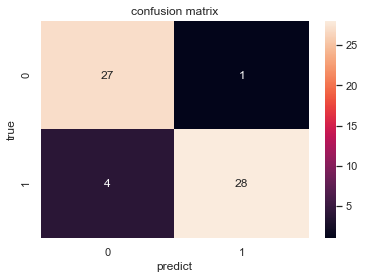

In [286]:
#plot the heatmap
import seaborn as sns
sns.set()
f,ax=plt.subplots()
y_true = y_test
y_pred = y_pred
C2= confusion_matrix(y_true, y_pred, labels=[0, 1])
sns.heatmap(C2,annot=True,ax=ax)

ax.set_title('confusion matrix') 
ax.set_xlabel('predict') 
ax.set_ylabel('true') 

plt.show()

In [287]:
# Print evaluation metrics 
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.96      0.92        28
           1       0.97      0.88      0.92        32

    accuracy                           0.92        60
   macro avg       0.92      0.92      0.92        60
weighted avg       0.92      0.92      0.92        60



# Insights and Strategies

- Target Marketing

- Website Modification

  - Average Time Spent per Session
  
  - Add to Cart
  
  - View More than 2 Products
  
  - Organic
  
  - View Product Details
  

- Ecommerce and Community Balance

In [386]:
lapapo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 196 entries, 0 to 149
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Number of Sessions              196 non-null    int64  
 1   Add to Cart                     196 non-null    int64  
 2   View Posts                      196 non-null    int64  
 3   View Categories                 196 non-null    int64  
 4   View Product Details            196 non-null    int64  
 5   Average Time Spent per Session  196 non-null    float64
 6   Purchase                        196 non-null    int64  
 7   Special Months                  196 non-null    int64  
 8   View More than 2 Products       196 non-null    int64  
 9   Mobile                          196 non-null    int64  
 10  Organic                         196 non-null    int64  
 11  Non-working                     196 non-null    int64  
 12  Total Time Spent                196 

In [501]:
lapapo_exp_y = lapapo['Purchase']
lapapo_exp_x = lapapo[['Number of Viewed Products','Add to Cart','View Posts','View Categories']]
# resampling to 50/50
sm = SMOTENC(sampling_strategy=45/55, random_state=50, categorical_features=[1,2,3])
lapapo_x_new, lapapo_y_new = sm.fit_resample(lapapo_exp_x, lapapo_exp_y)
print(f'Resampled dataset samples per class {Counter(lapapo_y_new)}')

Resampled dataset samples per class Counter({0: 150, 1: 122})


In [522]:
lapapo_x_new =lapapo[['Add to Cart','View Categories','View Posts','View Product Details','View More than 2 Products']]
lapapo_y_new = lapapo['Purchase']

In [523]:
import statsmodels.api as sm
logit_model=sm.Logit(lapapo_y_new,lapapo_x_new)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.478500
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:               Purchase   No. Observations:                  196
Model:                          Logit   Df Residuals:                      191
Method:                           MLE   Df Model:                            4
Date:                Fri, 25 Jun 2021   Pseudo R-squ.:                  0.1218
Time:                        13:28:28   Log-Likelihood:                -93.786
converged:                       True   LL-Null:                       -106.80
Covariance Type:            nonrobust   LLR p-value:                 3.130e-05
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Add to Cart                   1.8159      0.440      4.125      0.000       0.

In [509]:
lapapo_x_new =lapapo[['Average Time Spent per Session','Number of Sessions']]
lapapo_y_new = lapapo['Purchase']

In [510]:
import statsmodels.api as sm
logit_model=sm.Logit(lapapo_y_new,lapapo_x_new)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.418901
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:               Purchase   No. Observations:                  196
Model:                          Logit   Df Residuals:                      194
Method:                           MLE   Df Model:                            1
Date:                Fri, 25 Jun 2021   Pseudo R-squ.:                  0.2312
Time:                        12:38:29   Log-Likelihood:                -82.105
converged:                       True   LL-Null:                       -106.80
Covariance Type:            nonrobust   LLR p-value:                 2.102e-12
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Average Time Spent per Session     0.0145      0.003      5.223     

In [539]:
lapapo_x_new =lapapo[['Add to Cart','View Categories','View Product Details','View More than 2 Products']]
lapapo_y_new = lapapo['Average Time Spent per Session']

In [540]:
import statsmodels.api as sm
logit_model=sm.OLS(lapapo_y_new,lapapo_x_new)
result=logit_model.fit()
print(result.summary())

                                       OLS Regression Results                                      
Dep. Variable:     Average Time Spent per Session   R-squared (uncentered):                   0.613
Model:                                        OLS   Adj. R-squared (uncentered):              0.605
Method:                             Least Squares   F-statistic:                              76.00
Date:                            Thu, 01 Jul 2021   Prob (F-statistic):                    1.61e-38
Time:                                    11:56:34   Log-Likelihood:                         -1295.2
No. Observations:                             196   AIC:                                      2598.
Df Residuals:                                 192   BIC:                                      2612.
Df Model:                                       4                                                  
Covariance Type:                        nonrobust                                                  


# Conclusion and Future Research

## Unbalanced Dataset

## Sample Size

## Lack of Demographic Data

## Economic Models